## An Exploratory Analysis of the space race between U.S.A and U.S.S.R that changed everything

## 4th May, 2022

## Authors - Aastha Kathuria, Ashvita Chourey, Apurva Amrtikar, Poorva Joshi

“They turned their desks into a trigonometric war room, poring over equations scrawling ideas on blackboards, evaluating their work, erasing it, starting over.”
― Margot Lee Shetterly, Hidden Figures

The cold war to host the first unmanned space probes, launch the first satellites and human spaceflights began in 1957 between the United States and the Soviet Union. This war or the ‘Space Race’ as they call it, brought a huge technological evolution to mankind. The U.S.S.R launched its first artificial satellite in October of 1957 - ‘Sputnik’,  followed by the creation of NASA in 1958 and it was the Soviet’s who won the race with Cosomonaut ‘Yuri Gagrin’ being the first man to enter Earth’s orbit. 

Since 1957, around 600 humans and 4,500 satellites have reached space and today in 2022 we are here presenting a small analysis of the astronauts, costs, and many other factors involved which made these space missions successful.

Our primary visualization is a Heat Map that interacts with a histogram, giving us information about the Costs (in million dollars) that were involved in space missions between the years 1992 to 2020. The Y-axis of the heat map represents the companies that launched these missions, each colored cell within the heat map has the cost associated with the mission and the X-axis gives details about the particular month when the launch happened. The exact amount can be seen in the histogram by clicking on any cell.

We begin by cleaning some of the data before creating the heat  map.


 ###  Importing the libraries and getting Started with Exploratory Data Analysis

First, we start by getting the essential libraries.

In [1]:
import pandas as pd # importing a lot of libraries that we use
import numpy as np
import bqplot
import ipywidgets
from ipywidgets import interact
import matplotlib.pyplot as plt

#####  After this we get the data

In [2]:
astra = pd.read_csv("https://raw.githubusercontent.com/aasthakathuria/aasthakathuria.github.io/main/astronauts.csv") #importing dataset from relative path since direct URl was not present in Data Source.
Space=pd.read_csv("https://raw.githubusercontent.com/aasthakathuria/aasthakathuria.github.io/main/Space.csv")

#####  Now we drop the unnecessesary columns:

In [3]:
# data cleaning
Space.drop(['Unnamed: 0','Unnamed: 0.1'], axis =1, inplace = True)
astra.drop(['original_name','id'], axis =1, inplace = True)

#####  We split the datum column and rename the splitted columns as Year and month

In [4]:
Datum = Space.Datum.str.split(' ', expand = True) # splitting the datum column to date, time , year, month 
Space['Launch Year'] = Datum[3] # labelling the columns and dropping datum
Space['Launch Month'] = Datum[1]
Space.drop(['Datum'], axis = 1, inplace = True)

#####  We rename the columns and do some data modification i.e., replace blank spaces in column names with an underscore

In [5]:
#renaming the Rocket to Cost of Mission to know the puspose of the column
Space.rename(columns = {' Rocket' : 'Cost_of_Mission'}, inplace = True)
Space.columns = Space.columns.str.replace(" " , "_") 
# replacing space with _ for better understanding
Space.Cost_of_Mission.replace([','], '',regex = True, inplace = True)

##### We would need to convert columns like Cost_Of_Mission to numeric for processing it further

In [6]:
Space.Cost_of_Mission = pd.to_numeric(Space.Cost_of_Mission)
Space.Launch_Year = pd.to_numeric(Space.Launch_Year) # converting Launch YEar to numeric

#####  We now create a pivot table to organize the Space dataset to get desired heatmap

In [7]:
pivot_table = pd.pivot_table(Space, values=['Cost_of_Mission'], index=['Company_Name'],  # creating PIVOT table to create heatmap 
                             columns=['Launch_Month'], aggfunc=np.mean, fill_value=0)

In [8]:
l1=pivot_table.columns.levels[1].tolist() 

In [9]:
pivot_table.replace(0, np.nan, inplace=True)  # replacing 0 with nan's for pivot table

##### Creating the heatmap using the above pivot table. The pivot table will create a matrix where each cell contains the cost of a mission in a month for a spcefic company

In [10]:
# Scaling
col_sc = bqplot.ColorScale(scheme='inferno')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

#axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Month')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Company Name')

#Heatmap
heat_map = bqplot.GridHeatMap(color=np.log10(pivot_table.values),
                             row=pivot_table.index,
                             column=l1, 
                             scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             selected_style={'fill':'blue'})

fig = bqplot.Figure(title='COST OF MISSIONS BY A COMPANY IN RESPECTIVE MONTH YEARS',marks=[heat_map], axes=[col_ax,x_ax, y_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='inferno'), side='right'), Axis(label='…

ValueError: Unsupported dtype object

Our analysis tells us that the missions which had the maximum costs involved were initiated by either the U.S.S.R or the National Aeronautics and Space Administration (NASA), United States. This is evident by the ‘yellow’ and ‘orange’ color matrix which says that any average mission in a particular month costs somewhere over 3 million dollars for both the countries. This is followed by U.S. based companies such as Boeing, United Launch Alliance and the Russia-based International Launch Services (ILS).

##### We then create a Bar plot and a line chart which would give us details about the exact cost of mission along with the year in which the mission occurred

In [11]:
i,j = 15,8
mask = (Space['Launch_Month'] == pivot_table.columns.levels[1][j]) & \
       (Space['Company_Name'] ==  pivot_table.index[i])
# new, subset dataframe
Space_subset = Space[mask]
# grabing  years and sqft from pandas and pushing
grouped = Space_subset.groupby("Launch_Year")["Cost_of_Mission"].sum()

years = grouped.index
amount = grouped.values

x_scl = bqplot.DateScale() # rescaling the graph every time
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Launch Year', scale=x_scl)
ax_ycl = bqplot.Axis(label='Cost of Mission', scale=y_scl, 
                    orientation='vertical', side='left')

bar = bqplot.Bars(x = years, y = amount,  # creating histogram
                    scales = {'x': x_scl, 'y': y_scl})

line = bqplot.Lines(x = years, y = amount, stroke_width=3,  # creating line chart
                    scales = {'x': x_scl, 'y': y_scl}, colors=['red'])


fig_bar = bqplot.Figure(title='COST OF MISSION EVERY YEAR',marks = [bar], axes = [ax_ycl, ax_xcl])
fig_bar1 = bqplot.Figure(title='COST OF MISSION EVERY YEAR',marks = [line], axes = [ax_ycl, ax_xcl])



In [12]:
def select_value(change):
    i,j = change['owner'].selected[0]
    mask = (Space['Launch_Month'] == pivot_table.columns.levels[1][j]) & \
            (Space['Company_Name'] == pivot_table.index[i])
    # grabSpace subset dataframe
    Space_subset = Space[mask]
    # grab years and sqft from pandas
    grouped = Space_subset.groupby("Launch_Year")["Cost_of_Mission"].sum()
    years = grouped.index
    amount = grouped.values
    bar.x = years
    bar.y = amount
    
heat_map.observe(select_value, 'selected')

##### Now we display all three vizualizations together in the form of a dashboard for better insights. The Bar chart and the line chart represent similar values except that the bar chart shows the exact cost while the line chart helps us analyse the trends over the years on the money thatw was spent by a comapny 

In [13]:
heat_map.observe(select_value, 'selected')

fig = bqplot.Figure(marks = [heat_map], axes = [col_ax, y_ax, x_ax], 
                    fig_margin = dict(top=50, bottom=150, left=80, right=50), title='Cost of mission for different companies')
fig.layout.align_items

fig.layout.min_width='400px'
fig.layout.min_height='600px'
fig_bar.layout.min_width='350px'
fig_bar1.layout.min_width='350px'

ipywidgets.HBox([fig,fig_bar,fig_bar1])

One additional plot that we have added is an interactive line chart. The purpose of this chart is to show trends in the change in costs every year spent by companies. This can be seen by clicking on cells of the heat map. 

Some additional facts about how costs have changed since 2020 can be by the below image.
 
"In the last two decades, space startup companies have demonstrated they can compete against heavyweight aerospace contractors as Boeing and Lockheed Martin. Today, a SpaceX rocket launching can be 97% cheaper than a Russian Soyuz ride cost in the 60s.
The key to increasing cost efficiency?

SpaceX rocket boosters usually return to Earth in good enough condition that they’re able to be refurbished, which saves money and helps the company undercut competitors’ prices."

Citation:
Venditti, B. (2022, January 27). The Cost of Space Flight Before and After SpaceX. Retrieved from https://www.visualcapitalist.com/the-cost-of-space-flight/ 

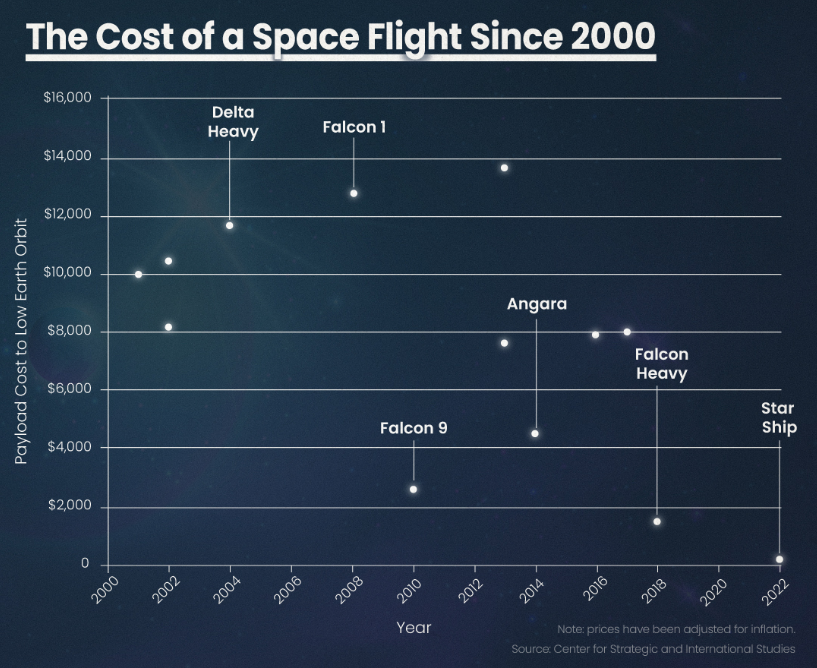

### Let us talk about astronauts in these space missions... 


We have talked about the cost and companies in the above visual which gives us the analysis of USA and Russia being the biggest countries who have launched the Rockets. Now let us talk about the real heroes without whom these missions never would have happened i.e Astronauts .

Let us do the Analysis of the Astronauts and their nationalities with the year that  they went to space and at what age and number of hours that they spend in space.

Analysis with respect to USA and Russia/U.S.S.R:

1. We can observe that the USSR/Russia and USA have launched the maximum number of rockets from the year 1957 to 2020.
2. We can observe that both of the countries have spent maximum hours in space.Now we can see that the average hours spent are between 0 to 1000 and 3000 and 5000 and Russia is 0 to 400 and 3000 to 3500 hours.
3. Now let us talk about astronauts age and year of the mission we can see that Age of Astronaut on Mission and Year of Mission tells us that at what year , what was the age of astronaut and we can see the answer as most astronauts have age between 33 and 43 and after year 1990 very few young astronauts were launched in SPace.
4. When we talk about the age of the astronauts  and hours spent  on the mission we can observe that maximum hours spent by an astronaut are aged between 45 and 55.


##### Let us calculate the age of the astronauts

In [14]:
astra["age_at_mission"] = astra["year_of_mission"] - astra["year_of_birth"] # Calculationg Age of the astraunauts

In [15]:
x_list=['nationality','age_at_mission'] # Taking Columns in a list 
y_list=['year_of_mission','hours_mission']  # Taking Columns in a list 

##### Let us create a function to creat the scatter plot

In [16]:
def astrofunc():  # defing a function which will be called later to set the values for the Scatter Plot
    with plt.style.context("dark_background"):
        ax=astra.plot(x="name",y="year_of_mission",figsize=(20,20),kind="scatter",color="red") 
        
    plt.xlabel("Country",fontsize = 16)
    plt.ylabel("Duration(Seconds)",fontsize = 16)
    plt.title("Relationship between the Country and Time",fontsize=22)
    ax.plot()

##### Calling the function and creating the dropdown so we can interact with the plot:

In [17]:
@ipywidgets.interact(x_axis_select=x_list,y_axis_select=y_list)  # defing a fuction to repreent a relationship between Countries, Age of Astraunauts and Hours Spend on the Missions
def astrofunc(x_axis_select=x_list,
            y_axis_select=y_list):
    with  plt.style.context("dark_background"):
      ax = astra.plot(x=x_axis_select,y=y_axis_select,figsize=(20,20),kind="scatter") 
  
#labels
 
    plt.title("Relationship between between Countries, Age of Astraunauts and Hours Spend and Years on the Missions By Astronauts",fontsize=22)
    plt.xticks(rotation=90)
    ax.plot()
  

    plt.show()

interactive(children=(Dropdown(description='x_axis_select', options=('nationality', 'age_at_mission'), value='…

# The yongest astronauts : Oliver Daeman : 18 year old to goto space
"https://www.businessinsider.com/jeff-bezos-spaceflight-blue-origin-final-passenger-oliver-daemen-life-2021-7"

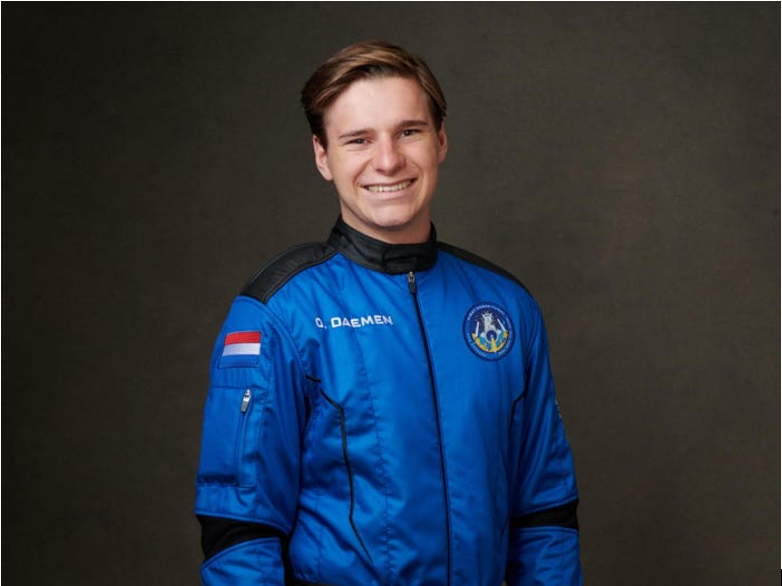

## Oldest astronaut to goto space at age 77: John Genn 

https://commons.wikimedia.org/wiki/File:JohnGlenn.jpg

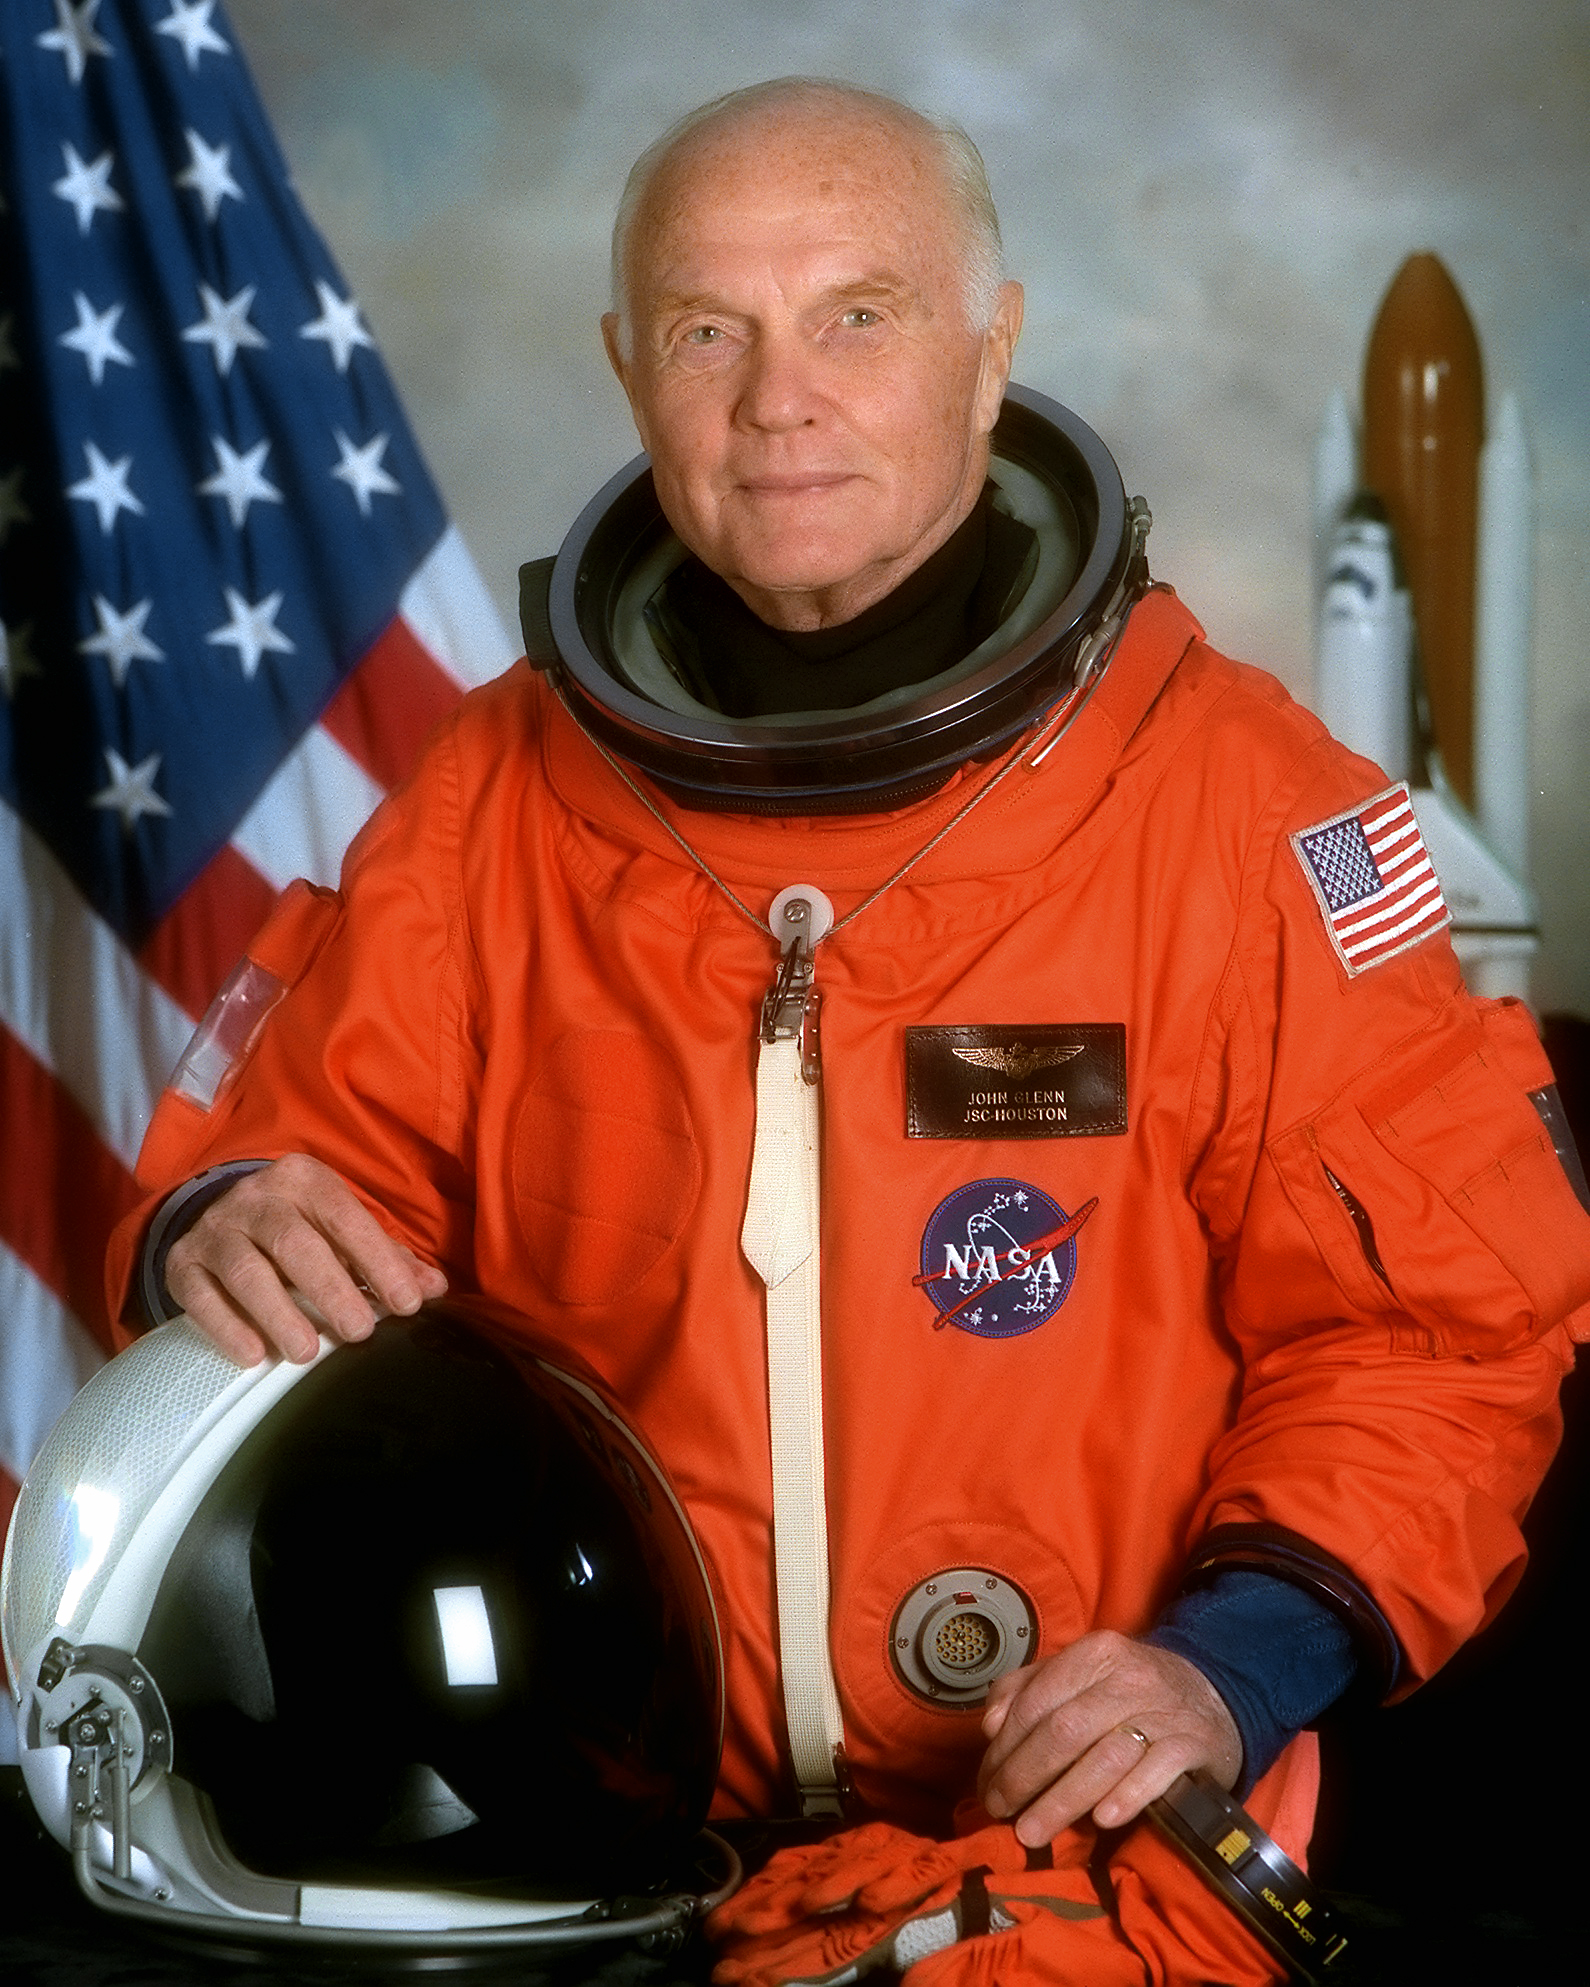

## Contextual Vizualizations

After having analyzed the plot of relation between countries, age of astronauts and hours spent and years spent on the missions by astronauts, we observed that the majority of astronauts were mainly  from two nations, Russia/U.S.S.R. and the United States. Now let's look at a plot which shows the number of successful orbital launches made by these two respective countries over six decades. 

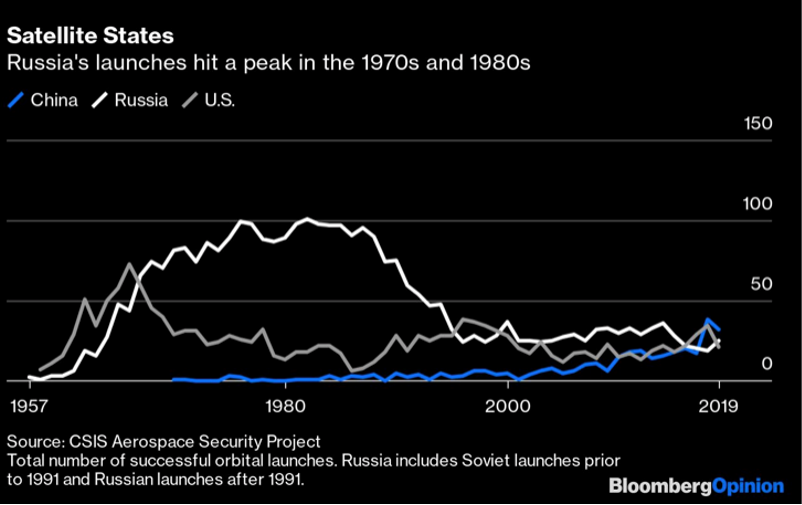

The plot showcases the total number of successful orbital launches for Russia, United States and China over the time period of 62 years from the years 1957 to 2019.
 Based on the hue for the line plot, the blue line represents the number of Chinese launches, whereas gray represents the number of United States launches and white represents the Russian launches. It can be inferred from the plot that Russia had a high number of launches as compared to the United States in the 1970s and 1980s. 
As the 2000s approached, the number of Russian launches reduced significantly, while in the 2000s the U.S. and Russian launches were in the same range in terms of number of successful orbital launches.

Citation
Marques, C.(2021,April 11). Race for Space:Elon Musk leaves Vladimir Putin stranded on Earth.Deccan Herald.https://www.deccanherald.com/international/race-for-space-elon-musk-leaves-vladimir-putin-stranded-on-earth-973141.html



## Space Station Spacewalks

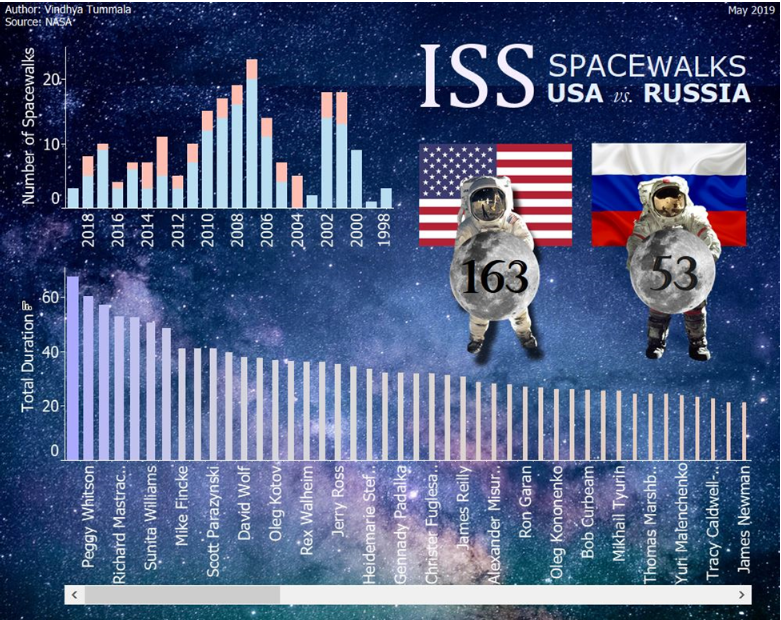

This plot compares the number of spacewalks amongst the USA and Russia over a span of 25 years years from 1995 to 2020. It also showcases the total duration of spacewalks by various astronauts from the USA and Russia.
It can clearly be seen that the number of spacewalks by the US, 163, is almost thrice the number of spacewalks by Russia, which is 53. From the first graph, it can be observed that until the year 2000, only Russia contributed to the spacewalks. But starting from the year 2001, the USA too contributed to the same, leaving Russia behind with the number of spacewalks, with the years 2002 and 2019 being the only exceptions. Also, from the second graph, it can be concluded that average time for spacewalks is somewhere between 35 to 40 hours.

Citation- NASA. (2019, April 28). 2019/W18: Space station spacewalks - dataset by makeovermonday. data.world. Retrieved May 6, 2022, from https://data.world/makeovermonday/2019w18 

# Space walking: A record of Russian and U.S. extra-vehicular activity

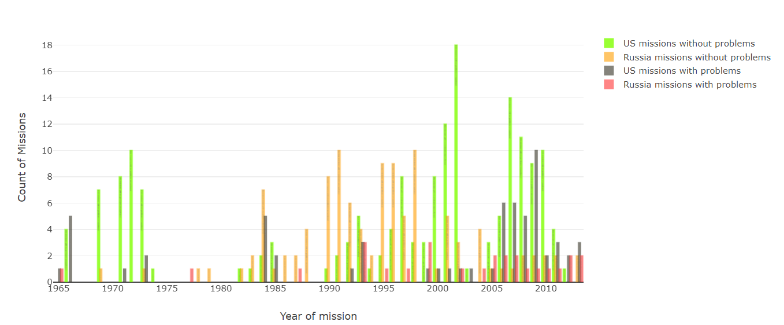

This plot compares various space missions by the US and Russia, based on whether the missions have encountered problems or not.
It compares the space missions over a span of 50years, from 1965 to 2015.
When comparing missions without any problems, it can be observed from the graph that the US missions without any problems is far more than that of Russia, which had significantly more missions with problems. There were on;y few years with exception to this.
When comparing missions without any problems, it can be observed from the graph that the US missions which encountered any problem is less than that of Russia.

Citation - NASA. “Space Walking.” Space Walking|Kaggle, Kaggle, https://www.kaggle.com/datasets/nasa/space-walking-russian-and-us-evas. 